# Confusion matrix 제일 아랫줄에 있습니다 !

In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# import tensorflow as tf

%matplotlib inline
# %matplotlib tk

In [2]:
leaning1 = pd.read_csv('./보조기/leaning1.csv')
leaning2 = pd.read_csv('./보조기/leaning2.csv')
non_use1 = pd.read_csv('./보조기/non_use1.csv')
non_use2 = pd.read_csv('./보조기/non_use2.csv')
sitting_chair1 = pd.read_csv('./보조기/sitting_chair1.csv')
sitting_chair2 = pd.read_csv('./보조기/sitting_chair2.csv')
sitting_floor1 = pd.read_csv('./보조기/sitting_floor1.csv')
sitting_floor2 = pd.read_csv('./보조기/sitting_floor2.csv')
slow_walking1 = pd.read_csv('./보조기/slow_walking1.csv')
slow_walking2 = pd.read_csv('./보조기/slow_walking2.csv')
standing1 = pd.read_csv('./보조기/standing1.csv')
standing2 = pd.read_csv('./보조기/standing2.csv')
walking1 = pd.read_csv('./보조기/walking1.csv')
walking2 = pd.read_csv('./보조기/walking2.csv')

files1 = [leaning1, non_use1, sitting_chair1, sitting_floor1, slow_walking1, standing1, walking1]
files2 = [leaning2, non_use2, sitting_chair2, sitting_floor2, slow_walking2, standing2, walking2]

In [3]:
label_list = ['leaning', 'non_use', 'sitting_chair', 'sitting_floor', 'slow_walking', 'standing', 'walking']

In [4]:
# 데이터 라벨링 and 데이터 합치기
leaning1['label'] = 'leaning'
leaning2['label'] = 'leaning'
non_use1['label'] = 'non_use'
non_use2['label'] = 'non_use'
sitting_chair1['label'] = 'sitting_chair'
sitting_chair2['label'] = 'sitting_chair'
sitting_floor1['label'] = 'sitting_floor'
sitting_floor2['label'] = 'sitting_floor'
slow_walking1['label'] = 'slow_walking'
slow_walking2['label'] = 'slow_walking'
standing1['label'] = 'standing'
standing2['label'] = 'standing'
walking1['label'] = 'walking'
walking2['label'] = 'walking'

In [5]:
leaning = pd.concat([leaning1, leaning2])[['Ax','Ay','Az']]
non_use = pd.concat([non_use1, non_use2])[['Ax','Ay','Az']]
sitting_chair = pd.concat([sitting_chair1, sitting_chair2])[['Ax','Ay','Az']]
sitting_floor = pd.concat([sitting_floor1, sitting_floor2])[['Ax','Ay','Az']]
slow_walking = pd.concat([slow_walking1, slow_walking2])[['Ax','Ay','Az']]
standing = pd.concat([standing1, standing2])[['Ax','Ay','Az']]
walking = pd.concat([walking1, walking2])[['Ax','Ay','Az']]

In [6]:
# posture = pd.concat([leaning1, non_use1, sitting_chair1, sitting_floor1, slow_walking1, standing1, walking1,
#                     leaning2, non_use2, sitting_chair2, sitting_floor2, slow_walking2, standing2, walking2])

In [7]:
# posture.to_csv('./보조기/posture.csv', index=False)

In [8]:
posture = pd.read_csv('./보조기/posture.csv')

In [9]:
leaning1['label'].values

array(['leaning', 'leaning', 'leaning', ..., 'leaning', 'leaning',
       'leaning'], dtype=object)

In [10]:
leaning_set_x = [leaning[i - 10:i].values for i in range(10, len(leaning))]
non_use_set_x = [non_use[i - 10:i].values for i in range(10, len(non_use))]
sitting_chair_set_x = [sitting_chair[i - 10:i].values for i in range(10, len(sitting_chair))]
sitting_floor_set_x = [sitting_floor[i - 10:i].values for i in range(10, len(sitting_floor))]
slow_walking_set_x = [slow_walking[i - 10:i].values for i in range(10, len(slow_walking))]
standing_set_x = [standing[i - 10:i].values for i in range(10, len(standing))]
walking_set_x = [walking[i - 10:i].values for i in range(10, len(walking))]

posture_set_x = np.array(leaning_set_x + non_use_set_x + sitting_chair_set_x + sitting_floor_set_x + slow_walking_set_x + standing_set_x + walking_set_x)

In [11]:
leaning_set_y = ['leaning' for x in range(len(leaning_set_x))]
non_use_set_y = ['non_use' for x in range(len(non_use_set_x))]
sitting_chair_set_y = ['sitting_chair' for x in range(len(sitting_chair_set_x))]
sitting_floor_set_y = ['sitting_floor' for x in range(len(sitting_floor_set_x))]
slow_walking_set_y = ['slow_walking' for x in range(len(slow_walking_set_x))]
standing_set_y = ['standing' for x in range(len(standing_set_x))]
walking_set_y = ['walking' for x in range(len(walking_set_x))]

posture_set_y = np.array(leaning_set_y + non_use_set_y + sitting_chair_set_y + sitting_floor_set_y + slow_walking_set_y + standing_set_y + walking_set_y)

In [12]:
posture_set_x.shape

(118494, 10, 3)

In [13]:
posture_set_x[0]

array([[  56,  661, -823],
       [  56,  661, -823],
       [  56,  661, -823],
       [  56,  661, -823],
       [  56,  661, -823],
       [  56,  661, -823],
       [  56,  661, -823],
       [  25,  648, -825],
       [  25,  648, -825],
       [  25,  648, -825]])

# EDA

In [14]:
posture

Time    Ax   Ay   Az  Gx  Gy  Gz  Mx  My  Mz  Temp  \
0       2022-11-02 15:26:15    56  661 -823   3  -2   0 -84  21  -1  32.6   
1       2022-11-02 15:26:15    56  661 -823   3  -2   0 -84  21  -1  32.6   
2       2022-11-02 15:26:15    56  661 -823   3  -2   0 -84  21  -1  32.6   
3       2022-11-02 15:26:15    56  661 -823   3  -2   0 -84  21  -1  32.6   
4       2022-11-02 15:26:15    56  661 -823   3  -2   0 -84  21  -1  32.6   
...                     ...   ...  ...  ...  ..  ..  ..  ..  ..  ..   ...   
118559  2022-11-02 15:16:03   882  210  -19 -43  -1 -20  34  31  12  31.7   
118560  2022-11-02 15:16:03  1011   99   -3 -18  15  -1  32  34   9  31.7   
118561  2022-11-02 15:16:03  1011   99   -3 -18  15  -1  32  34   9  31.7   
118562  2022-11-02 15:16:03   983  175  -50 -19   4  14  30  38  14  31.7   
118563  2022-11-02 15:16:03   983  175  -50 -19   4  14  30  38  14  31.7   

        Humidity  Pressure  Mic  Light    label  
0          34.75   1018.16    1      0  leaning  
1          34.75   1018.16    1      0  leaning  
2          34.75   1018.16    1      0  leaning  
3          34.75   1018.16    1      0  leaning  
4          34.75   1018.16    1      0  leaning  
...          ...       ...  ...    ...      ...  
118559     32.36   1018.12    1      0  walking  
118560     32.37   1018.17    1      0  walking  
118561     32.37   1018.17    1      0  walking  
118562     32.37   1018.17    1      0  walking  
118563     32.37   1018.17    1      0  walking  

[118564 rows x 16 columns]

In [15]:
columns = posture.columns[1:10]

In [16]:
df_list = []
for label in label_list:
    df_list.append(posture[posture['label'] == label][columns].reset_index(drop=True))
    df_list[-1].columns = [column + '_' + label for column in columns]

In [17]:
df_list

[       Ax_leaning  Ay_leaning  Az_leaning  Gx_leaning  Gy_leaning  Gz_leaning  \
 0              56         661        -823           3          -2           0   
 1              56         661        -823           3          -2           0   
 2              56         661        -823           3          -2           0   
 3              56         661        -823           3          -2           0   
 4              56         661        -823           3          -2           0   
 ...           ...         ...         ...         ...         ...         ...   
 18620          83         624        -827           0           0           0   
 18621          83         624        -827           0           0           0   
 18622          83         624        -827           0           0           0   
 18623          83         624        -827           0           0           0   
 18624          83         624        -827           0           0           0   
 
        Mx_lea

In [18]:
corr_posture = pd.concat(df_list, axis=1)

In [19]:
corr_posture.dropna(axis=0)

Ax_leaning  Ay_leaning  Az_leaning  Gx_leaning  Gy_leaning  Gz_leaning  \
0           56.0       661.0      -823.0         3.0        -2.0         0.0   
1           56.0       661.0      -823.0         3.0        -2.0         0.0   
2           56.0       661.0      -823.0         3.0        -2.0         0.0   
3           56.0       661.0      -823.0         3.0        -2.0         0.0   
4           56.0       661.0      -823.0         3.0        -2.0         0.0   
...          ...         ...         ...         ...         ...         ...   
3486        68.0       616.0      -831.0         0.0         0.0         0.0   
3487        68.0       616.0      -831.0         0.0         0.0         0.0   
3488        68.0       616.0      -831.0         0.0         0.0         0.0   
3489        68.0       616.0      -831.0         0.0         0.0         0.0   
3490        68.0       616.0      -831.0         0.0         0.0         0.0   

      Mx_leaning  My_leaning  Mz_leaning  Ax_non_use  ...  Mz_standing  \
0          -84.0        21.0        -1.0          70  ...         -6.0   
1          -84.0        21.0        -1.0          70  ...         -6.0   
2          -84.0        21.0        -1.0          70  ...         -6.0   
3          -84.0        21.0        -1.0          70  ...         -6.0   
4          -84.0        21.0        -1.0          70  ...         -6.0   
...          ...         ...         ...         ...  ...          ...   
3486       -82.0        17.0        -3.0          54  ...         -1.0   
3487       -82.0        17.0        -3.0          54  ...         -2.0   
3488       -82.0        17.0        -3.0          54  ...         -2.0   
3489       -82.0        17.0        -3.0          54  ...         -2.0   
3490       -82.0        17.0        -3.0          54  ...         -2.0   

      Ax_walking  Ay_walking  Az_walking  Gx_walking  Gy_walking  Gz_walking  \
0         1034.0        85.0       -25.0         0.0         0.0         0.0   
1         1015.0       115.0       -23.0         2.0        10.0         3.0   
2         1061.0        56.0         9.0        -2.0         5.0         8.0   
3         1016.0       128.0       -27.0         1.0       -10.0         0.0   
4         1030.0       128.0       -21.0        10.0       -15.0         5.0   
...          ...         ...         ...         ...         ...         ...   
3486       882.0       210.0       -19.0       -43.0        -1.0       -20.0   
3487      1011.0        99.0        -3.0       -18.0        15.0        -1.0   
3488      1011.0        99.0        -3.0       -18.0        15.0        -1.0   
3489       983.0       175.0       -50.0       -19.0         4.0        14.0   
3490       983.0       175.0       -50.0       -19.0         4.0        14.0   

      Mx_walking  My_walking  Mz_walking  
0           10.0       -28.0        75.0  
1           10.0       -24.0        81.0  
2           11.0       -26.0        82.0  
3            8.0       -25.0        75.0  
4            9.0       -23.0        82.0  
...          ...         ...         ...  
3486        34.0        31.0        12.0  
3487        32.0        34.0         9.0  
3488        32.0        34.0         9.0  
3489        30.0        38.0        14.0  
3490        30.0        38.0        14.0  

[3491 rows x 63 columns]

In [20]:
corr_posture.describe()

Ax_leaning    Ay_leaning    Az_leaning    Gx_leaning    Gy_leaning  \
count  18625.000000  18625.000000  18625.000000  18625.000000  18625.000000   
mean      76.313772    623.095570   -836.206711     -0.030443      0.120966   
std       14.123330     11.141752     14.864498      0.881442      0.537893   
min       25.000000    532.000000   -878.000000    -19.000000     -9.000000   
25%       70.000000    618.000000   -841.000000      0.000000      0.000000   
50%       76.000000    622.000000   -837.000000      0.000000      0.000000   
75%       83.000000    628.000000   -831.000000      0.000000      0.000000   
max      433.000000    890.000000   -238.000000      7.000000      6.000000   

         Gz_leaning    Mx_leaning    My_leaning    Mz_leaning    Ax_non_use  \
count  18625.000000  18625.000000  18625.000000  18625.000000  33021.000000   
mean       0.008215    -82.042148     19.303570     -1.833826     59.079767   
std        0.290875      1.430595      1.543569      2.206294      8.110476   
min       -3.000000    -86.000000     12.000000    -10.000000    -64.000000   
25%        0.000000    -83.000000     18.000000     -3.000000     56.000000   
50%        0.000000    -82.000000     19.000000     -1.000000     60.000000   
75%        0.000000    -81.000000     20.000000      0.000000     62.000000   
max        7.000000    -77.000000     24.000000      5.000000    111.000000   

       ...   Mz_standing   Ax_walking   Ay_walking   Az_walking   Gx_walking  \
count  ...  17719.000000  3491.000000  3491.000000  3491.000000  3491.000000   
mean   ...     -1.856595  1021.100831    -0.262103    -3.027499   -14.515325   
std    ...      4.236601   185.662119   145.294434   124.301850    60.673342   
min    ...    -22.000000   448.000000  -685.000000  -376.000000  -183.000000   
25%    ...     -3.000000   907.000000  -107.000000   -85.000000   -51.000000   
50%    ...     -1.000000   989.000000     3.000000   -21.000000   -13.000000   
75%    ...      0.000000  1114.000000   105.000000    64.000000    17.500000   
max    ...      8.000000  1756.000000   546.000000   443.000000   178.000000   

        Gy_walking   Gz_walking   Mx_walking   My_walking   Mz_walking  
count  3491.000000  3491.000000  3491.000000  3491.000000  3491.000000  
mean      0.656545    -0.032369    25.627900     8.048983    46.587511  
std      11.321344    10.304106    11.194627    30.323276    35.069215  
min     -45.000000   -35.000000    -1.000000   -46.000000    -6.000000  
25%      -7.000000    -7.000000    16.000000   -19.000000    13.000000  
50%       0.000000     0.000000    30.000000     9.000000    39.000000  
75%       8.000000     7.000000    34.000000    35.000000    82.000000  
max      62.000000    33.000000    45.000000    83.000000   120.000000  

[8 rows x 63 columns]

In [21]:
corr_posture.mean()

Ax_leaning     76.313772
Ay_leaning    623.095570
Az_leaning   -836.206711
Gx_leaning     -0.030443
Gy_leaning      0.120966
                 ...    
Gy_walking      0.656545
Gz_walking     -0.032369
Mx_walking     25.627900
My_walking      8.048983
Mz_walking     46.587511
Length: 63, dtype: float64

In [22]:
corr_colunms = corr_posture.columns
corr_columns = [x for i,x in enumerate(corr_colunms) if i%9<3]

In [23]:
corr_posture.describe()[corr_columns]

Ax_leaning    Ay_leaning    Az_leaning    Ax_non_use    Ay_non_use  \
count  18625.000000  18625.000000  18625.000000  33021.000000  33021.000000   
mean      76.313772    623.095570   -836.206711     59.079767    -74.169014   
std       14.123330     11.141752     14.864498      8.110476      5.806656   
min       25.000000    532.000000   -878.000000    -64.000000   -128.000000   
25%       70.000000    618.000000   -841.000000     56.000000    -78.000000   
50%       76.000000    622.000000   -837.000000     60.000000    -74.000000   
75%       83.000000    628.000000   -831.000000     62.000000    -70.000000   
max      433.000000    890.000000   -238.000000    111.000000     58.000000   

         Az_non_use  Ax_sitting_chair  Ay_sitting_chair  Az_sitting_chair  \
count  33021.000000      13480.000000      13480.000000      13480.000000   
mean   -1025.795978        866.275668        331.923368       -443.266988   
std        6.673225         27.124440         62.045915         37.815941   
min    -1073.000000        741.000000       -148.000000       -659.000000   
25%    -1030.000000        849.000000        324.000000       -470.000000   
50%    -1026.000000        868.000000        335.000000       -441.000000   
75%    -1022.000000        882.000000        349.000000       -423.000000   
max     -833.000000       1083.000000        437.000000       -238.000000   

       Ax_sitting_floor  ...  Az_sitting_floor  Ax_slow_walking  \
count      23652.000000  ...      23652.000000      8576.000000   
mean         997.924235  ...       -220.718459      1018.056670   
std            6.234825  ...         19.467533        61.289592   
min          972.000000  ...       -292.000000       726.000000   
25%          993.000000  ...       -232.000000       989.000000   
50%          997.000000  ...       -224.000000      1009.000000   
75%         1001.000000  ...       -214.000000      1032.000000   
max         1028.000000  ...       -111.000000      1436.000000   

       Ay_slow_walking  Az_slow_walking   Ax_standing   Ay_standing  \
count      8576.000000      8576.000000  17719.000000  17719.000000   
mean         11.658582       -24.230294   1018.612055     48.409335   
std          85.912158        66.459894      5.482011     26.292736   
min        -312.000000      -220.000000    985.000000    -31.000000   
25%         -52.000000       -74.000000   1016.000000     25.000000   
50%          13.000000       -21.000000   1018.000000     52.000000   
75%          83.000000        19.000000   1022.000000     66.000000   
max         232.000000       236.000000   1056.000000    185.000000   

        Az_standing   Ax_walking   Ay_walking   Az_walking  
count  17719.000000  3491.000000  3491.000000  3491.000000  
mean     -52.467916  1021.100831    -0.262103    -3.027499  
std       19.034230   185.662119   145.294434   124.301850  
min     -177.000000   448.000000  -685.000000  -376.000000  
25%      -64.000000   907.000000  -107.000000   -85.000000  
50%      -52.000000   989.000000     3.000000   -21.000000  
75%      -40.000000  1114.000000   105.000000    64.000000  
max       39.000000  1756.000000   546.000000   443.000000  

[8 rows x 21 columns]

In [24]:
corr_posture.mean()[corr_columns]

Ax_leaning            76.313772
Ay_leaning           623.095570
Az_leaning          -836.206711
Ax_non_use            59.079767
Ay_non_use           -74.169014
Az_non_use         -1025.795978
Ax_sitting_chair     866.275668
Ay_sitting_chair     331.923368
Az_sitting_chair    -443.266988
Ax_sitting_floor     997.924235
Ay_sitting_floor      44.743278
Az_sitting_floor    -220.718459
Ax_slow_walking     1018.056670
Ay_slow_walking       11.658582
Az_slow_walking      -24.230294
Ax_standing         1018.612055
Ay_standing           48.409335
Az_standing          -52.467916
Ax_walking          1021.100831
Ay_walking            -0.262103
Az_walking            -3.027499
dtype: float64

In [26]:
posture[posture['label'] == 'leaning'][columns]

Ax   Ay   Az  Gx  Gy  Gz  Mx  My  Mz
0      56  661 -823   3  -2   0 -84  21  -1
1      56  661 -823   3  -2   0 -84  21  -1
2      56  661 -823   3  -2   0 -84  21  -1
3      56  661 -823   3  -2   0 -84  21  -1
4      56  661 -823   3  -2   0 -84  21  -1
...    ..  ...  ...  ..  ..  ..  ..  ..  ..
71015  83  624 -827   0   0   0 -85  17  -6
71016  83  624 -827   0   0   0 -85  17  -6
71017  83  624 -827   0   0   0 -85  17  -6
71018  83  624 -827   0   0   0 -85  17  -6
71019  83  624 -827   0   0   0 -85  17  -6

[18625 rows x 9 columns]

In [27]:
posture[columns].corr()

Ax        Ay        Az        Gx        Gy        Gz        Mx  \
Ax  1.000000 -0.186453  0.964274 -0.034944  0.033326  0.003467  0.707246   
Ay -0.186453  1.000000 -0.111552  0.021528  0.014218 -0.013358 -0.729564   
Az  0.964274 -0.111552  1.000000 -0.046177  0.049844  0.000253  0.623831   
Gx -0.034944  0.021528 -0.046177  1.000000 -0.115710 -0.145121 -0.068117   
Gy  0.033326  0.014218  0.049844 -0.115710  1.000000 -0.261502  0.017042   
Gz  0.003467 -0.013358  0.000253 -0.145121 -0.261502  1.000000 -0.001197   
Mx  0.707246 -0.729564  0.623831 -0.068117  0.017042 -0.001197  1.000000   
My  0.650263  0.432777  0.635804  0.001299  0.035700 -0.006854  0.184866   
Mz -0.064278 -0.065753 -0.116143 -0.054963 -0.002159 -0.006587  0.279369   

          My        Mz  
Ax  0.650263 -0.064278  
Ay  0.432777 -0.065753  
Az  0.635804 -0.116143  
Gx  0.001299 -0.054963  
Gy  0.035700 -0.002159  
Gz -0.006854 -0.006587  
Mx  0.184866  0.279369  
My  1.000000  0.035105  
Mz  0.035105  1.000000

In [28]:
corr_posture = corr_posture.corr()

In [29]:
corr_posture.iloc[0:9,0:9]

Ax_leaning  Ay_leaning  Az_leaning  Gx_leaning  Gy_leaning  \
Ax_leaning    1.000000    0.398941    0.578533   -0.074359   -0.017676   
Ay_leaning    0.398941    1.000000    0.619994    0.051061    0.009593   
Az_leaning    0.578533    0.619994    1.000000   -0.042769   -0.060858   
Gx_leaning   -0.074359    0.051061   -0.042769    1.000000    0.122376   
Gy_leaning   -0.017676    0.009593   -0.060858    0.122376    1.000000   
Gz_leaning   -0.007973   -0.008162   -0.001644   -0.344993   -0.128181   
Mx_leaning    0.326241    0.079750    0.061281   -0.008129   -0.054708   
My_leaning    0.148324    0.166704    0.093640    0.015751   -0.028063   
Mz_leaning   -0.167609   -0.079222   -0.054395    0.002160    0.005774   

            Gz_leaning  Mx_leaning  My_leaning  Mz_leaning  
Ax_leaning   -0.007973    0.326241    0.148324   -0.167609  
Ay_leaning   -0.008162    0.079750    0.166704   -0.079222  
Az_leaning   -0.001644    0.061281    0.093640   -0.054395  
Gx_leaning   -0.344993   -0.008129    0.015751    0.002160  
Gy_leaning   -0.128181   -0.054708   -0.028063    0.005774  
Gz_leaning    1.000000   -0.011426   -0.034017    0.010925  
Mx_leaning   -0.011426    1.000000    0.086595   -0.062476  
My_leaning   -0.034017    0.086595    1.000000   -0.065093  
Mz_leaning    0.010925   -0.062476   -0.065093    1.000000

<AxesSubplot:>

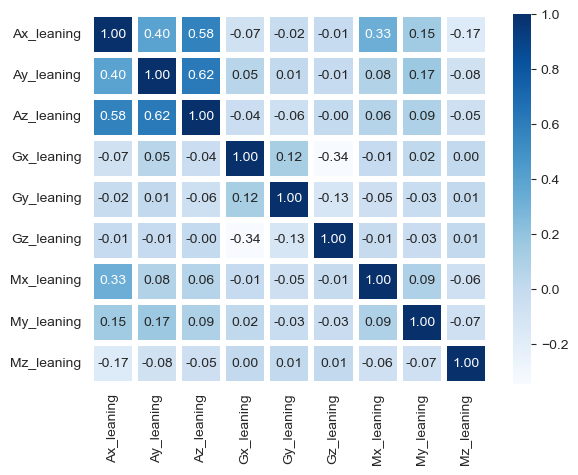

In [30]:
sns.heatmap(data = corr_posture.iloc[0:9,0:9], annot=True, fmt = '.2f', linewidths= 4, cmap='Blues')

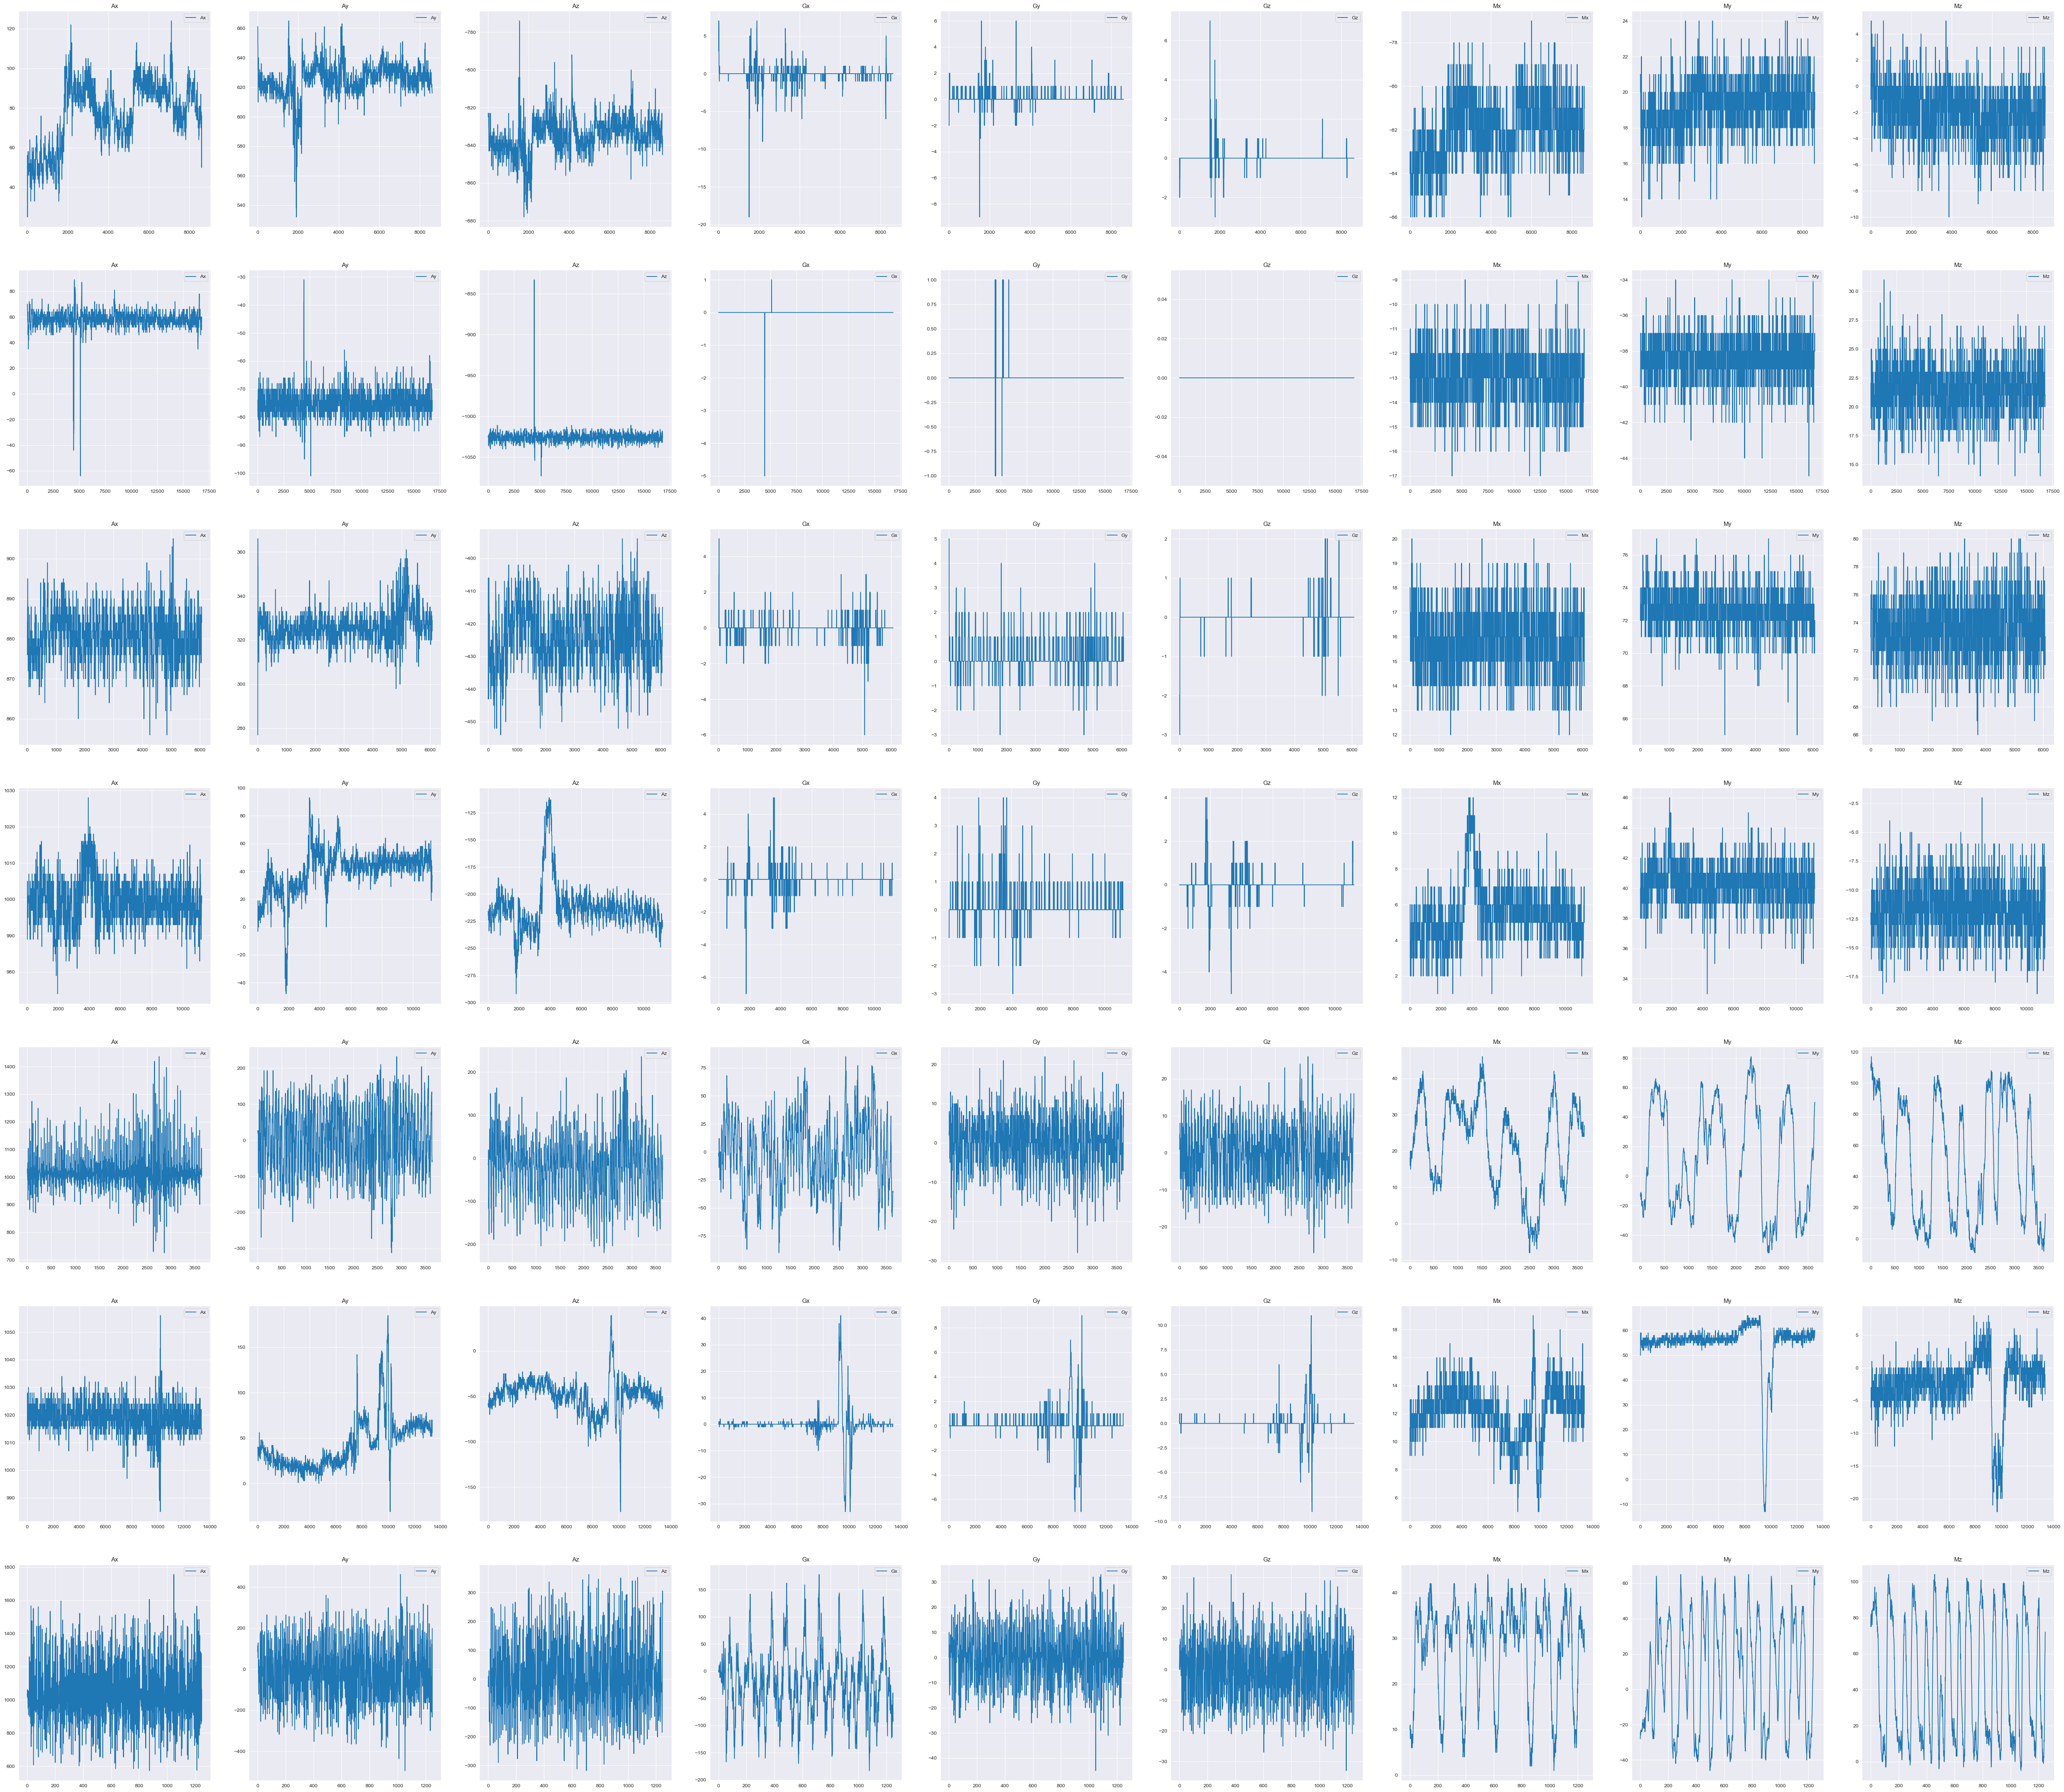

In [30]:
fig = plt.figure(figsize=(9*8, 7*9))

ax_list = []

for i, file in enumerate(files1):
    for j, column in enumerate(columns):
        ax_list.append(plt.subplot(7,9,i*9+j+1))
        ax_list[i*9+j].plot(file[column], label = column)
        plt.legend(loc = 'upper right')
        plt.title(column)


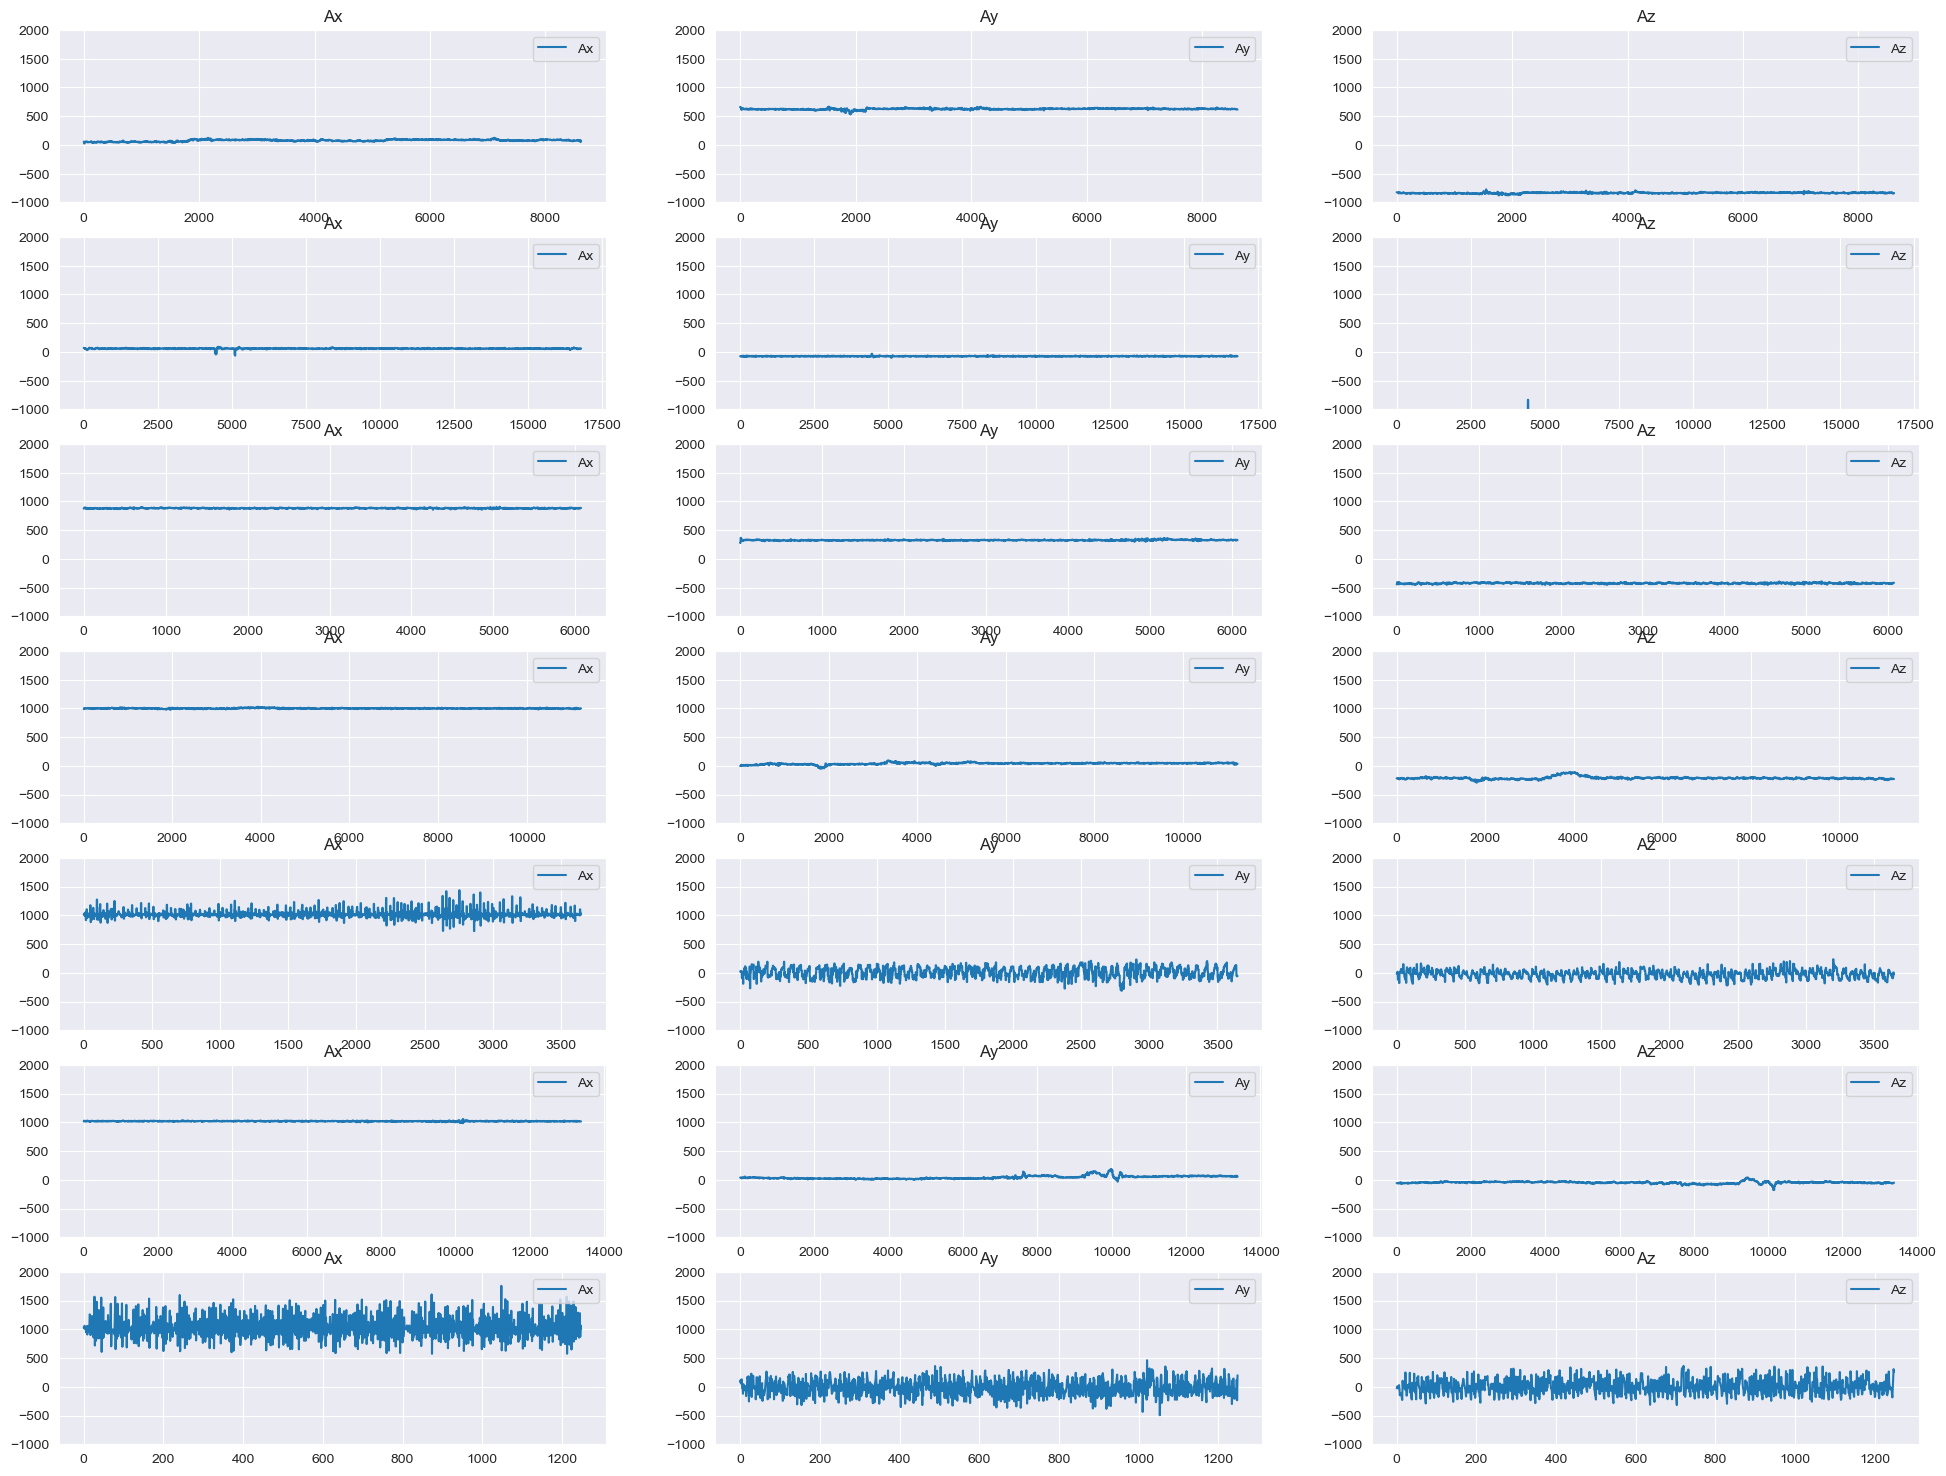

In [29]:
fig = plt.figure(figsize = (24,56))

for i, file in enumerate(files1):
    for j, column in enumerate(columns[0:3]):
        ax = plt.subplot(21,3,i*3+j+1)
        ax.plot(file[column], label = column)
        ax.set_ylim([-1000,2000])
        plt.legend(loc = 'upper right')
        plt.title(column)

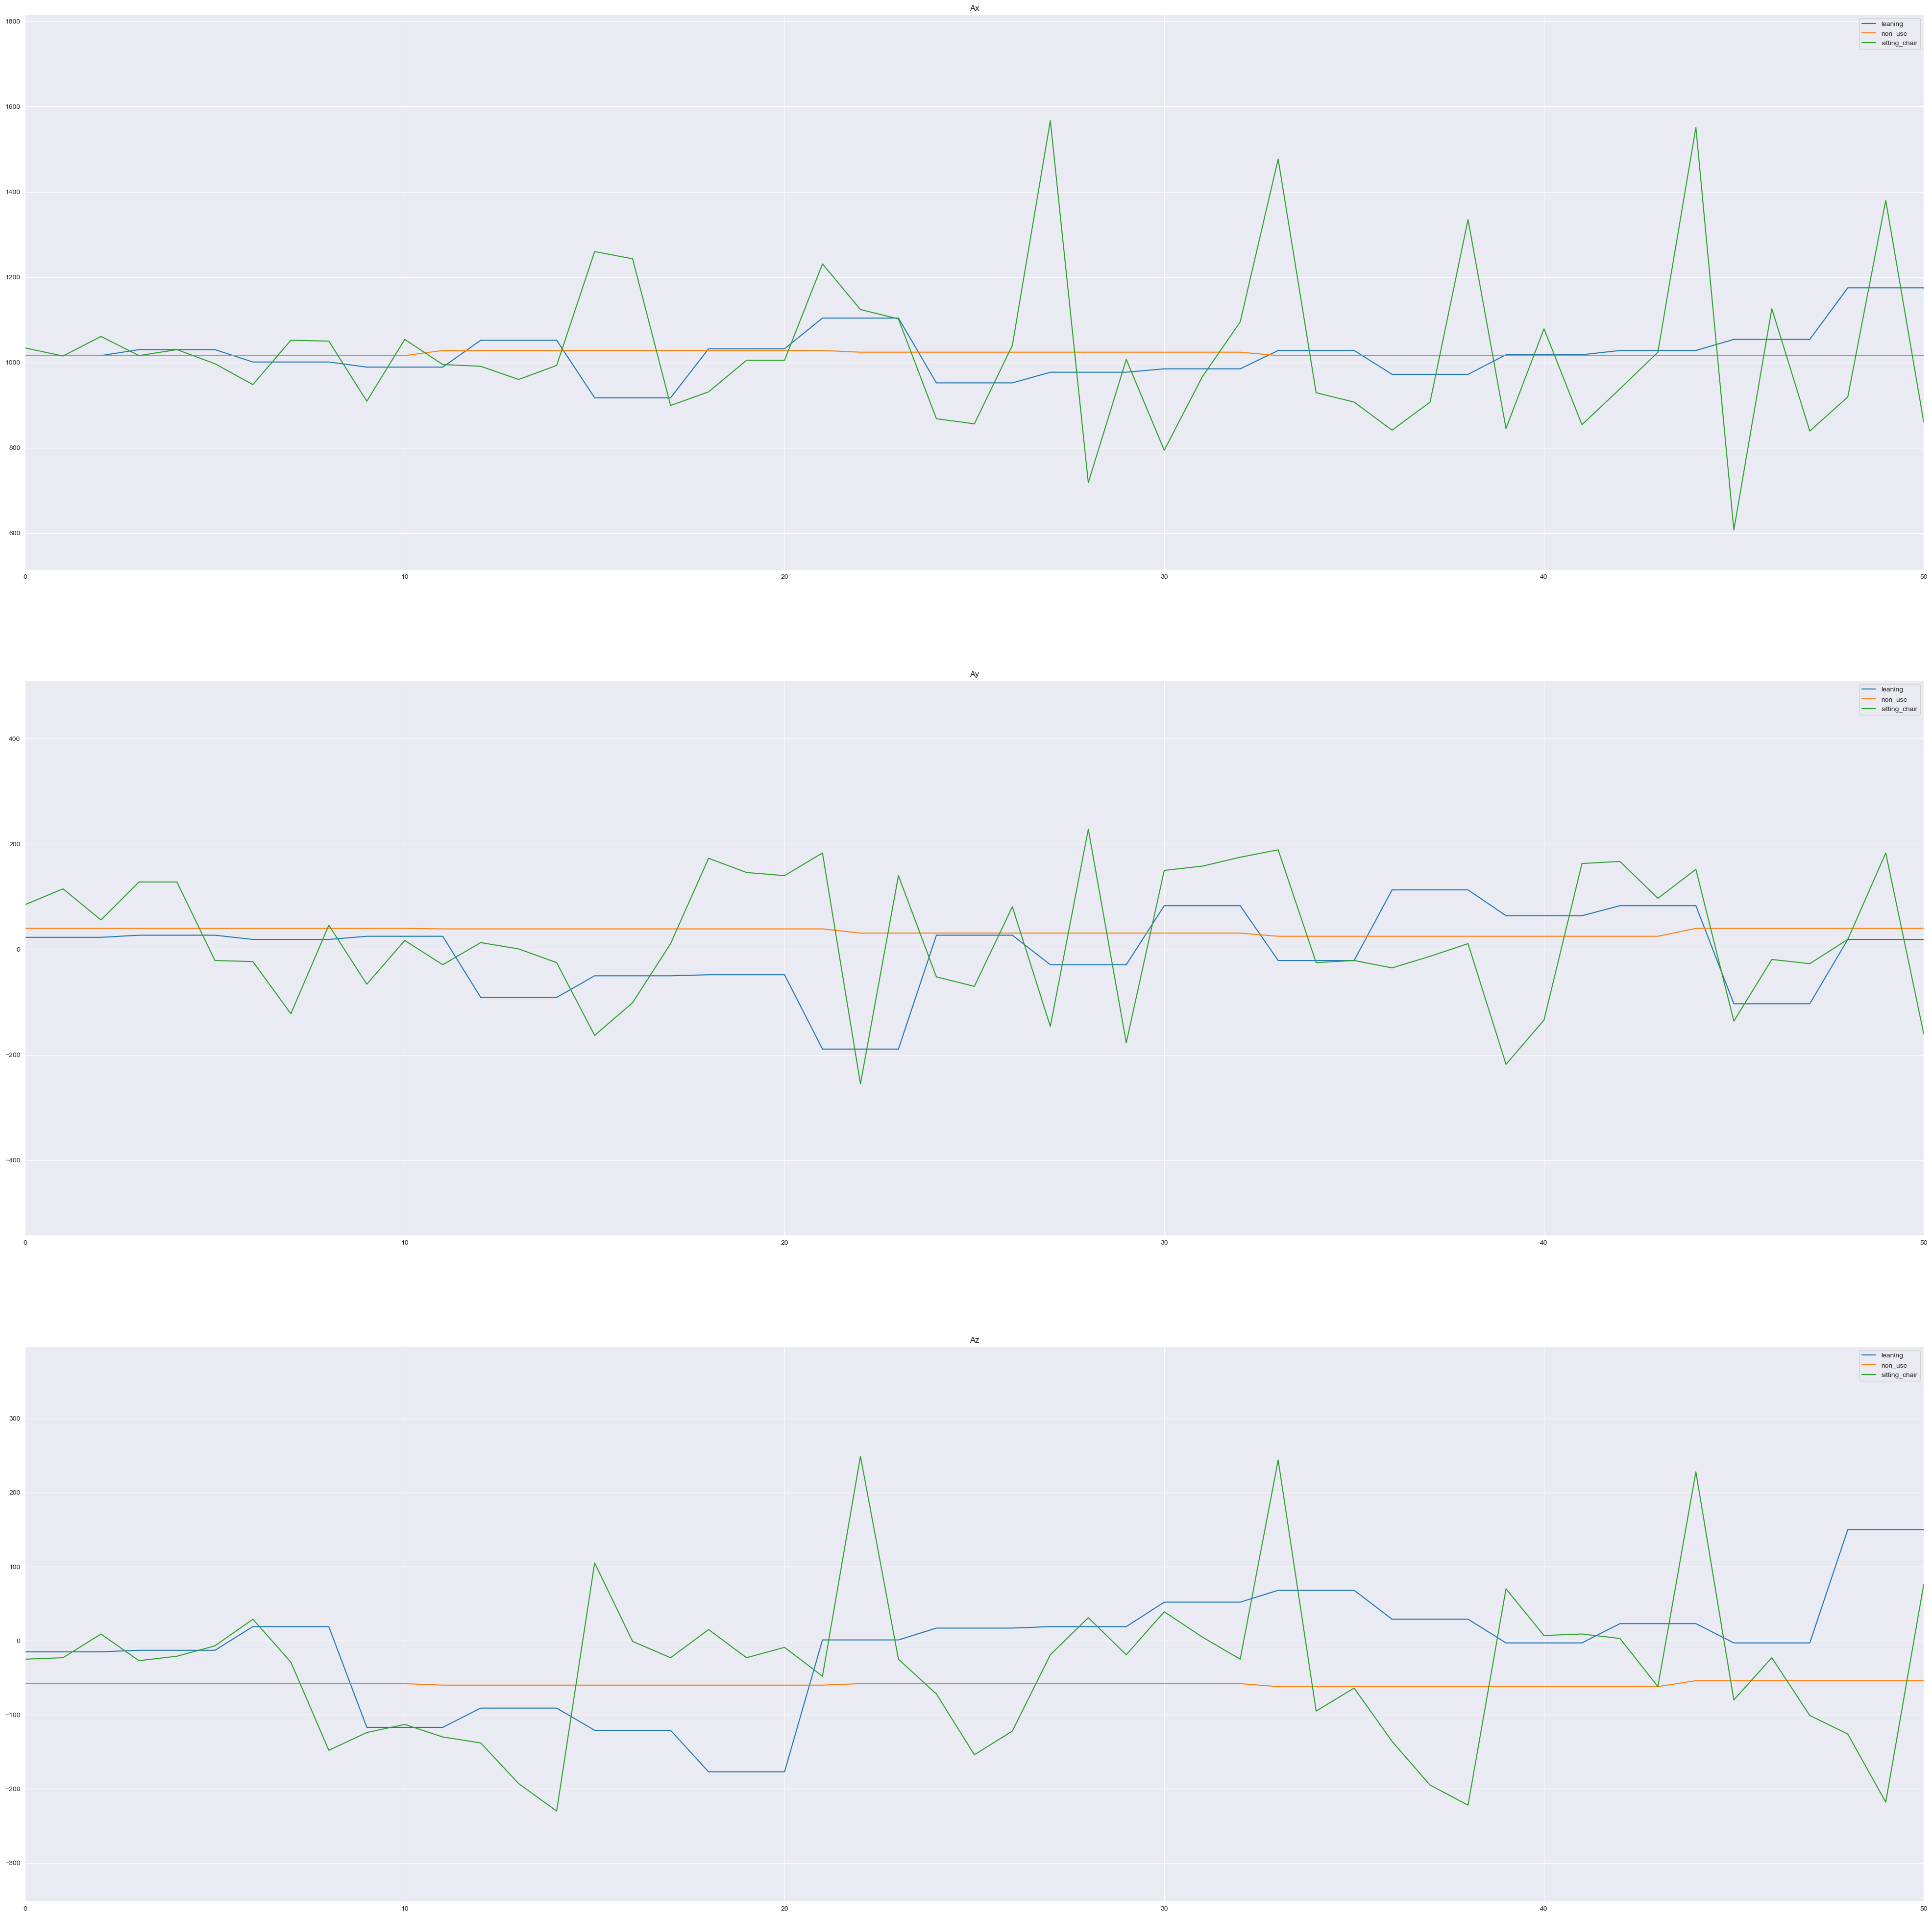

In [100]:
fig = plt.figure(figsize = (50,50))

for j, column in enumerate(columns[0:3]):
    ax = plt.subplot(3,1,j+1)

    for i, file in enumerate(files1[4:]):
        ax.plot(file[column], label = label_list[i])

    ax.set_xlim([0,50])
    plt.legend(loc = 'upper right')
    plt.title(column)

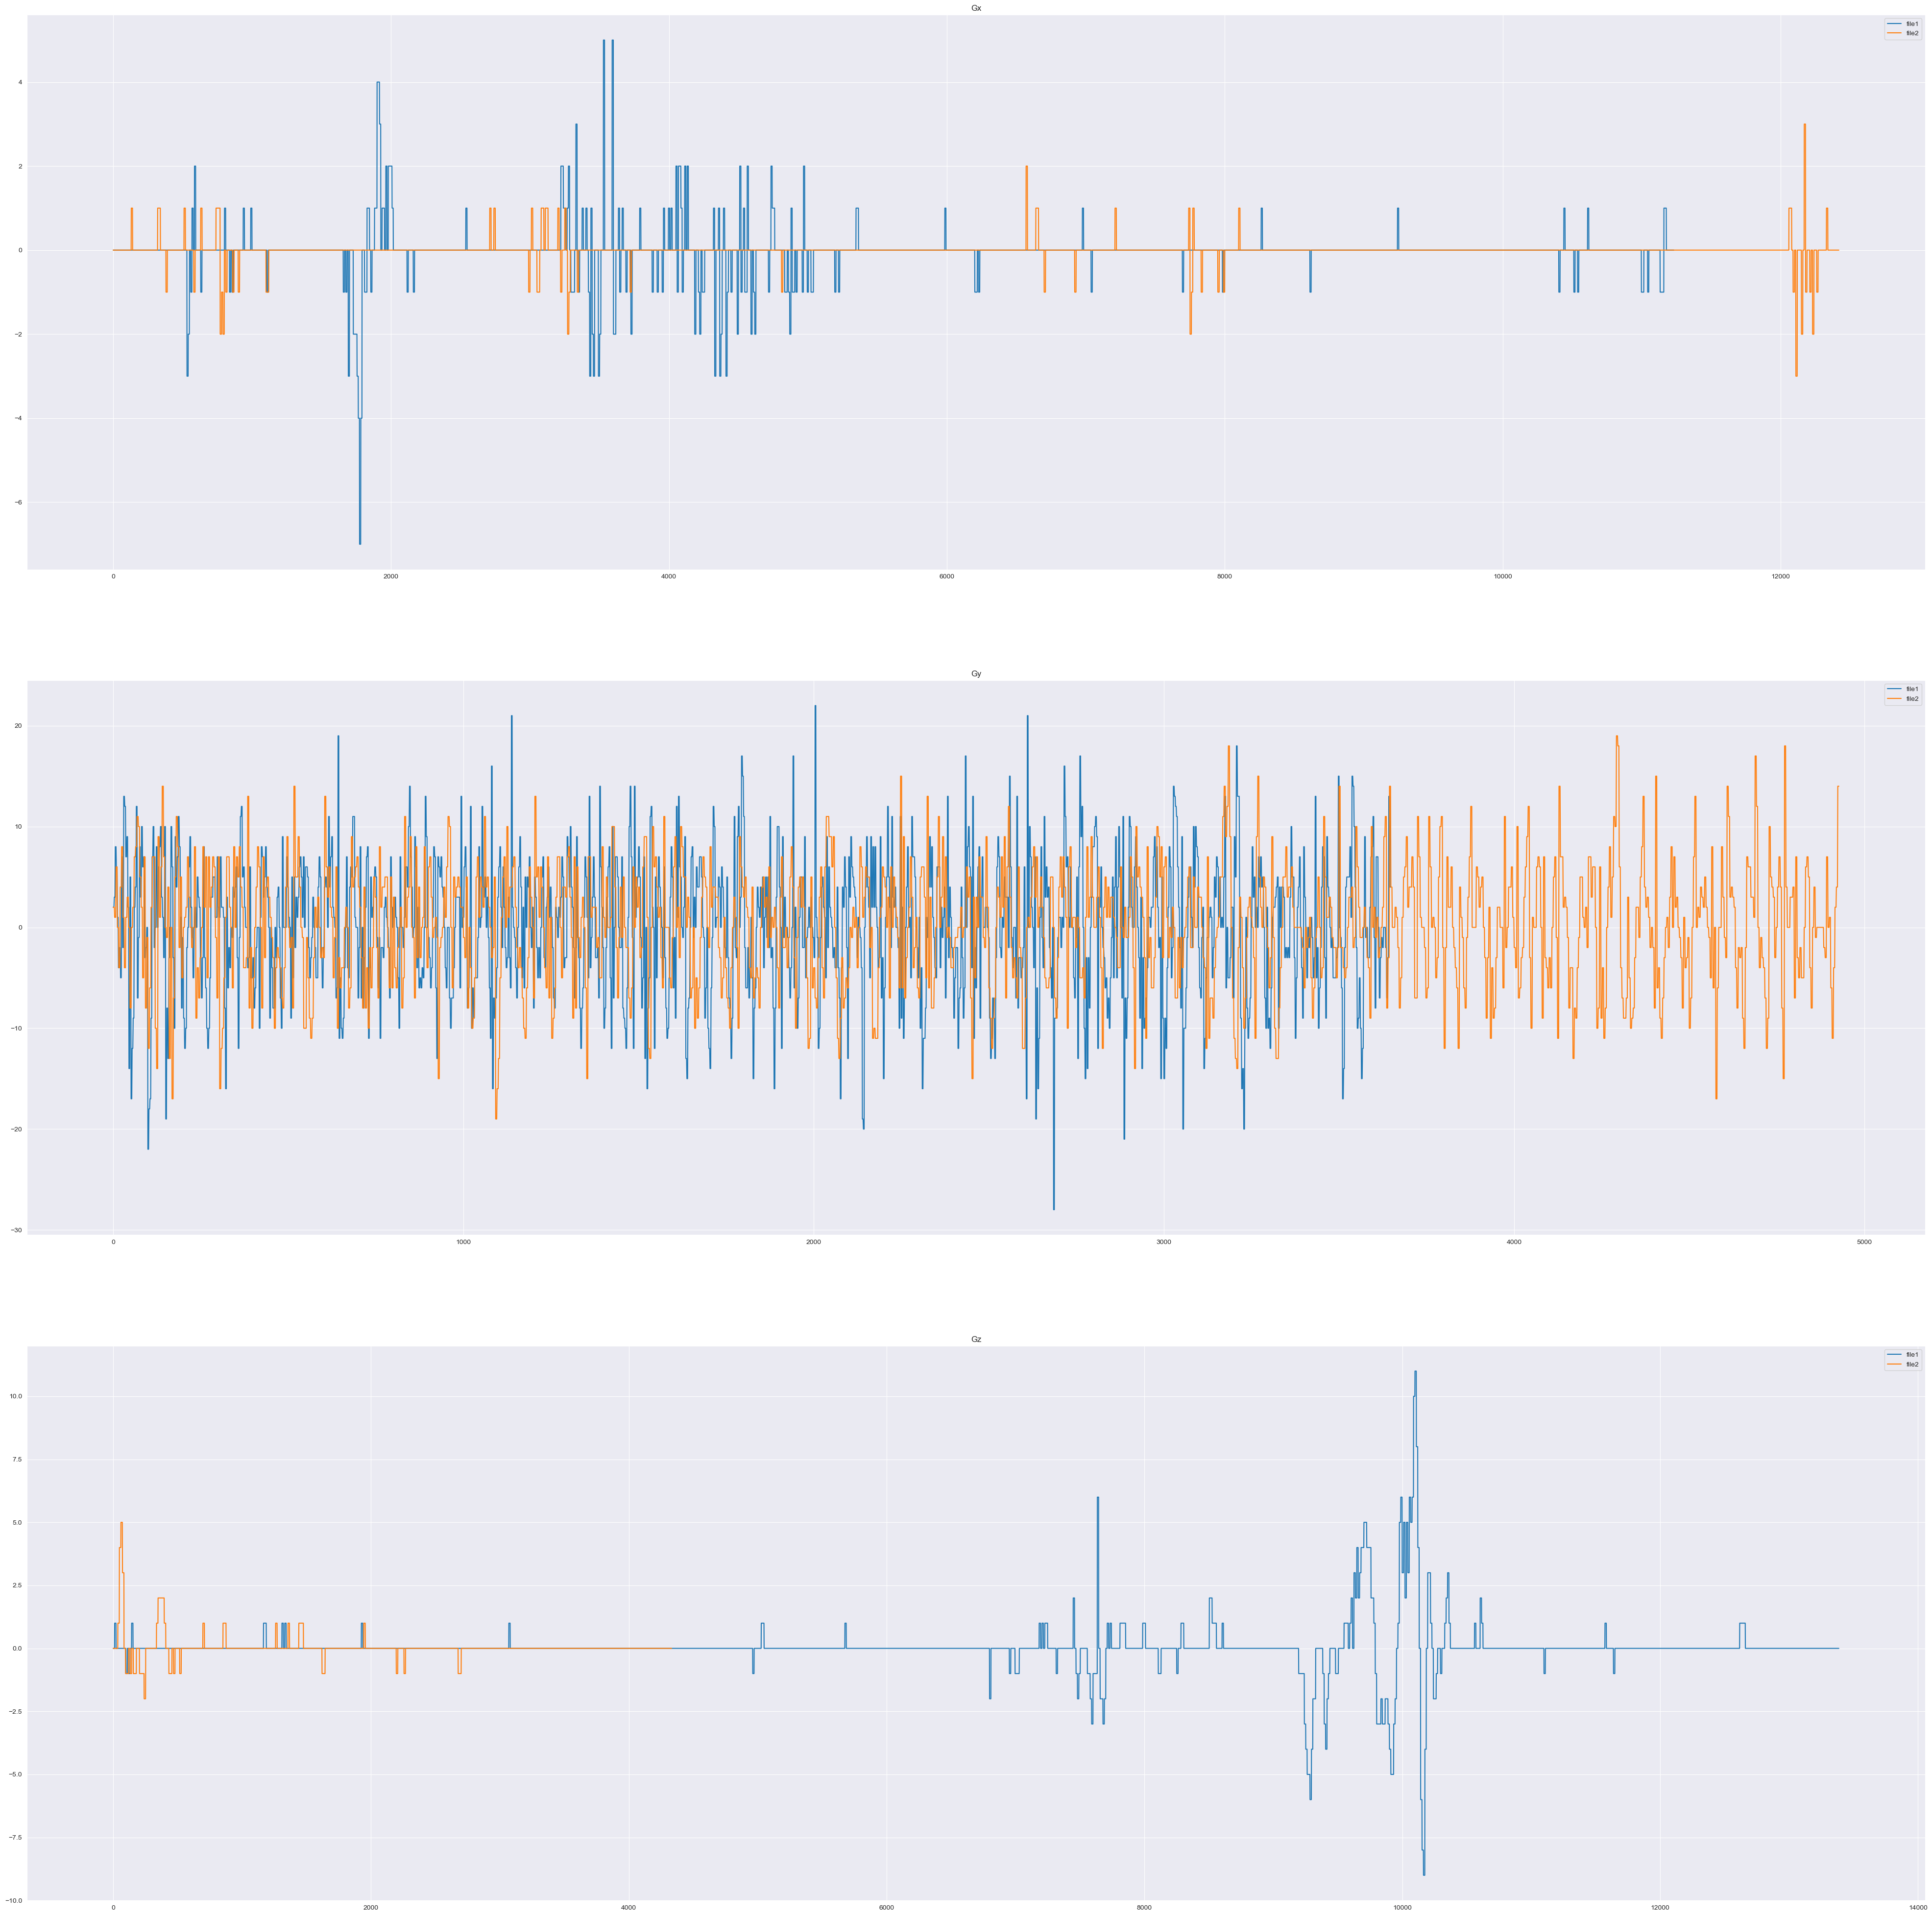

In [54]:
fig = plt.figure(figsize = (50,50))

for j, column in enumerate(columns[3:6]):
    ax = plt.subplot(3,1,j+1)
    ax.plot(files1[j+3][column], label = 'file1')
    ax.plot(files2[j+3][column], label = 'file2')
    # ax.set_axis('scaled')
    # ax.set_ylim([-1000,2000])
    plt.legend(loc = 'upper right')
    plt.title(column)

In [95]:
plt.close()

# Recurrent plot

In [87]:
def rec_plot(s, eps=0.01, steps=10):
    N=s.size
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
    return Z

(8617, 8617)
(63, 63)


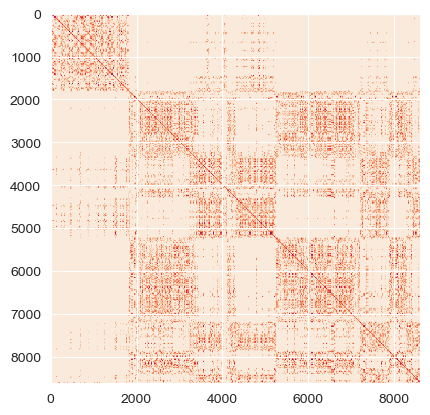

In [89]:
z = rec_plot(files1[0]['Ax'].to_numpy())
print(z.shape)
print(corr_posture.shape)
plt.imshow(z)

# 3D Scatter plot

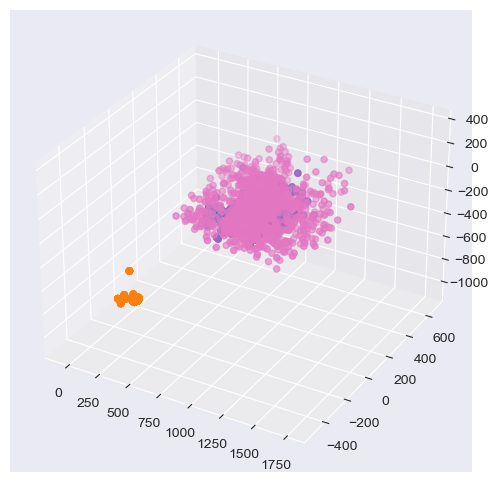

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection = '3d')

for i ,file in enumerate(files1):
    # if file == walking1:continue
    ax.scatter(file['Ax'], file['Ay'], file['Az'], label = label_list[i], cmap= 'Blues')

plt.show()

# Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [16]:
x_train, x_test, y_train, y_test = train_test_split(posture[['Ax','Ay','Az']].values,posture['label'].values, test_size=0.3, random_state=10)

In [17]:
x_set_train, x_set_test, y_set_train, y_set_test = train_test_split(posture_set_x, posture_set_y, test_size=0.3, random_state=10)

In [18]:
x_train[1]

array([1018,   21,  -35])

In [67]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(82994, 3) (35570, 3) (82994,) (35570,)


In [68]:
print(x_set_train.shape, x_set_test.shape, y_set_train.shape, y_set_test.shape)

(82945, 10, 3) (35549, 10, 3) (82945,) (35549,)


In [87]:
x_set_train.shape

(82945, 10, 3)

In [19]:
x_set_train = x_set_train.reshape(x_set_train.shape[0],-1)
x_set_test = x_set_test.reshape(x_set_test.shape[0],-1)

In [71]:
x_train[0]

array([   60,   -78, -1028])

In [90]:
list(x_set_train[0].shape

[10, 3]

# PCA and SVM Classification

In [20]:
pca = PCA(n_components=3)

x_train_reduced = pca.fit_transform(scale(x_train))
x_test_reduced = pca.fit_transform(scale(x_test))

In [21]:
pca = PCA(n_components=3)

x_train_reduced = pca.fit_transform(scale(x_train))
x_test_reduced = pca.fit_transform(scale(x_test))

In [51]:
x_train_reduced

array([[-1.48148996, -1.18623348, -0.01775804],
       [ 1.57723962, -0.12328803,  0.1882315 ],
       [-1.735403  ,  1.70965643,  0.12393816],
       ...,
       [ 1.17894819, -0.04451863, -0.12585068],
       [ 1.17565661, -0.11244358, -0.13294758],
       [-1.48469418, -1.13653643, -0.01356228]])

In [66]:
pca_svm = svm.SVC()
pca_svm.fit(x_train, y_train)

y_pred = pca_svm.predict(x_test)

print('accuracy : ', metrics.accuracy_score(y_test,y_pred))
print('con_mat : \n', metrics.confusion_matrix(y_test,y_pred))

accuracy :  0.9432386842845094
con_mat :  [[5651    0    0    0    0    0    0]
 [   0 9934    0    0    0    0    0]
 [   0    0 3915   62    0    0    2]
 [   0    0    0 7114    0   37    0]
 [   0    0    0  111 1309 1109   37]
 [   0    0    0   23   28 5194    0]
 [   0    0    1   72  387  150  434]]


In [78]:
pca_svm1 = svm.SVC()
pca_svm1.fit(x_train_reduced, y_train)

y_pred = pca_svm1.predict(x_test_reduced)

print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
print('con_mat : \n', metrics.confusion_matrix(y_test, y_pred))

accuracy :  0.9557773404554399
con_mat :  [[5651    0    0    0    0    0    0]
 [   0 9934    0    0    0    0    0]
 [   0    0 3939   40    0    0    0]
 [   0    0    6 7118    0   27    0]
 [   0    0    0   85 1800  628   53]
 [   0    0    0   17  175 5053    0]
 [   0    0    7   49  416   70  502]]


In [79]:
# model save
from joblib import dump, load
dump(pca_svm, './svm_model.h5')
dump(pca_svm1, './pca_svm_model.h5')

['./pca_svm_model.h5']

In [80]:
svm_model = load('./svm_model.h5')
pca_svm_model = load('./pca_svm_model.h5')

In [72]:
list(x_test[0])

[874, 325, -429]

In [74]:
print(x_test)

[[  874   325  -429]
 [ 1278   103   304]
 [  976  -132   -31]
 ...
 [   58   -72 -1026]
 [  993    54  -230]
 [   50   -70 -1032]]


In [83]:
svm_model.predict(x_test[0:5])

array(['sitting_chair', 'walking', 'slow_walking', 'leaning', 'leaning'],
      dtype=object)

In [84]:
y_test[0:5]

array(['sitting_chair', 'walking', 'slow_walking', 'leaning', 'leaning'],
      dtype=object)

# Set Data PCA and SVM

In [25]:
len(num_pc)

NameError: name 'num_pc' is not defined

Explained variance per principal component: [6.65968129e-01 3.17652445e-01 9.62723810e-03 1.09113106e-03
 7.84500022e-04 6.15682845e-04 4.74340164e-04 4.25094854e-04
 3.58815947e-04 3.03799111e-04 2.90002204e-04 2.74768547e-04
 2.21968131e-04 2.03442491e-04 1.91465700e-04 1.88631572e-04
 1.74418876e-04 1.68006976e-04 1.58763046e-04 1.49023949e-04
 1.25927008e-04 1.19502215e-04 9.88589148e-05 9.18264698e-05
 7.74005610e-05 4.31010416e-05 3.86990684e-05 3.29350899e-05
 2.78325034e-05 2.22497447e-05]


array([ 66.6 ,  98.37,  99.33,  99.44,  99.52,  99.58,  99.63,  99.67,
        99.71,  99.74,  99.77,  99.8 ,  99.82,  99.84,  99.86,  99.88,
        99.9 ,  99.92,  99.94,  99.95,  99.96,  99.97,  99.98,  99.99,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  ])

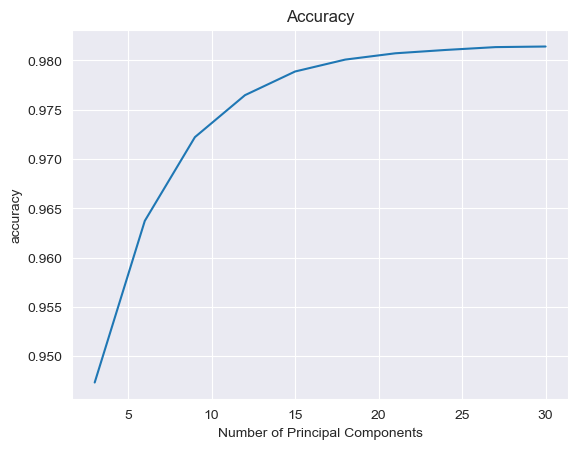

In [22]:
set_pca = PCA()

x_set_train_reduced = set_pca.fit_transform(scale(x_set_train))
x_set_test_reduced = set_pca.fit_transform(scale(x_set_test))

# x_set_train_reduced.astype(np.float64)
# x_set_test_reduced.astype(np.float64)

set_pca_svm = svm.SVC()
accuracy = []

for i in range(3,31,3):
    score = cross_val_score(set_pca_svm, x_set_train_reduced[:,:i], y_set_train, cv = 5, scoring = 'accuracy').mean()
    accuracy.append(score)

num_pc = np.arange(3,31,3)
plt.plot(num_pc, accuracy)
plt.xlabel("Number of Principal Components")
plt.ylabel("accuracy")
plt.title("Accuracy")

print('Explained variance per principal component: {}'.format(set_pca.explained_variance_ratio_[:30]))

np.cumsum(np.round(set_pca.explained_variance_ratio_[:30], decimals = 4)*100)

In [74]:
set_pca = PCA(n_components=30)

x_set_train_reduced = set_pca.fit_transform(scale(x_set_train))
x_set_test_reduced = set_pca.fit_transform(scale(x_set_test))

set_pca_svm = svm.SVC()
set_pca_svm.fit(x_set_train_reduced, y_set_train)

y_set_pred = set_pca_svm.predict(x_set_test_reduced)

print('accuracy : ', metrics.accuracy_score(y_set_test,y_set_pred))
print('con_mat : \n', metrics.confusion_matrix(y_set_test,y_set_pred))

accuracy :  0.9790711412416664
con_mat : 
 [[ 5457     0     0     0     0     0     0]
 [    0 10001     0     0     0     0     0]
 [    0     0  4012    36     0     0     0]
 [    0     0     7  7095     0    12     0]
 [    0     0     0    27  2132   366    52]
 [    0     0     0    20   159  5149     0]
 [    0     0     0     0    65     0   959]]


In [75]:
set_svm = svm.SVC()
set_svm.fit(x_set_train, y_set_train)

y_set_pred = set_svm.predict(x_set_test)

print('accuracy : ', metrics.accuracy_score(y_set_test,y_set_pred))
print('con_mat : ', metrics.confusion_matrix(y_set_test,y_set_pred))

accuracy :  0.9658499535851923
con_mat :  [[ 5457     0     0     0     0     0     0]
 [    0 10001     0     0     0     0     0]
 [    0     0  3982    66     0     0     0]
 [    0     0     0  7056     0    58     0]
 [    0     0     0    71  1631   838    37]
 [    0     0     0    21    29  5278     0]
 [    0     0     0     1    89     4   930]]


# 여러모델 테스트

In [23]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('XBoostingClassifier', XGBClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

/Users/leebyeonghwa/opt/anaconda3/envs/torch/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [92]:
x_set_train[0]

array([[   50,   -70, -1018],
       [   50,   -70, -1018],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032],
       [   64,   -72, -1032]])

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
names = []

for name, model in models:
    #Complete the code here
    kfold = StratifiedKFold(n_splits = 5, shuffle= True, random_state=2)
    cv_results = cross_val_score(model, x_set_train, y_set_train, cv = kfold)

    names.append(name)
    results.append(cv_results)

    print(name, "(average of accuracy) :",cv_results.mean())
    print('con_mat : \n', metrics.confusion_matrix(y_set_test, y_set_pred))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [93]:
for name, model in models:
    model.fit(x_set_train,y_set_train)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [43]:
from joblib import dump
dump(set_pca_svm, './set_pca_svm.joblib')

for name, model in models:
    dump(model, f'./{name}.joblib')

In [81]:
set_pca_svm.predict(x_set_train[0].reshape(1,-1))

array(['walking'], dtype='<U13')

In [29]:
model_names = [name for name, model in models]

In [32]:
from joblib import load
load_models = list()

for name in model_names:
    load_models.append((name,load(f'./{name}.joblib')))

In [33]:
load_models

[('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('XBoostingClassifier',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, objective='multi:softprob', predictor='auto',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                subsample=1, tree_method='exact', validate_parameters=1,
                verbosity=None)),
 ('LogisticRegression', LogisticRegression())]

In [37]:
for name, model in load_models:

    y_set_pred = model.predict(x_set_test)

    print('-'*30)
    print(f'Model name : {name}')
    print('accuracy : ', metrics.accuracy_score(y_set_test,y_set_pred))
    print('con_mat : \n', metrics.confusion_matrix(y_set_test,y_set_pred))
    print('-'*30)

------------------------------
Model name : RandomForestClassifier
accuracy :  0.9987904019803652
con_mat : 
 [[ 5457     0     0     0     0     0     0]
 [    0 10001     0     0     0     0     0]
 [    0     0  4047     1     0     0     0]
 [    0     0     0  7114     0     0     0]
 [    0     0     0     0  2564     6     7]
 [    0     0     0     0    10  5318     0]
 [    0     0     0     0    19     0  1005]]
------------------------------
------------------------------
Model name : DecisionTreeClassifier
accuracy :  0.9939520099018256
con_mat : 
 [[ 5457     0     0     0     0     0     0]
 [    0 10001     0     0     0     0     0]
 [    0     0  4048     0     0     0     0]
 [    0     0     4  7109     0     1     0]
 [    0     0     0     1  2497    29    50]
 [    0     0     0     0    17  5311     0]
 [    0     0     0     0   108     5   911]]
------------------------------
------------------------------
Model name : AdaBoostClassifier
accuracy :  0.810290022